#Lab4 ESR Resonance voltage

Evgeny Kolonsky

v0.1.2

In [31]:
!pip install uncertainties

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from uncertainties import ufloat
from uncertainties.umath import *

In [33]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/'

def smooth(signal, window_size):
    box = np.ones(window_size) / window_size
    signal_smoothed = np.convolve(signal, box, mode='same')
    return signal_smoothed

# 50 Hz experiment

DC = 0 A

[422.37436771 434.43465233 426.39446259]
resonance voltage 428+/-5 mV


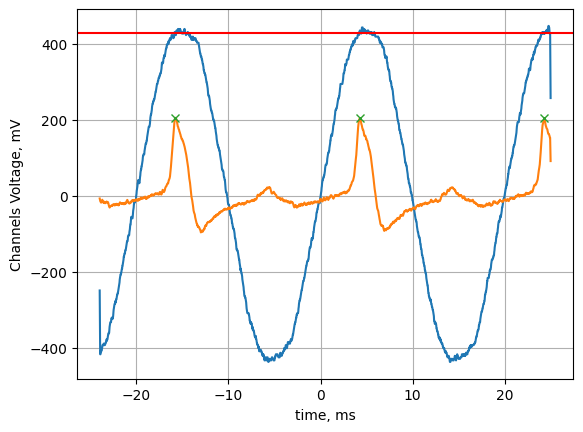

In [34]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/1.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                     usecols=[1,2,3], unpack=True)

ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

ch1 = smooth(ch1, 5)
ch2 = smooth(ch2, 5)

plt.plot(t, ch1)
plt.plot(t, ch2)
plt.grid()
peaks, locs = find_peaks(ch2, height=100, distance=100)
plt.plot(t[peaks], ch2[peaks], 'x')
print(ch1[peaks])
vmean = np.mean(np.abs(ch1[peaks]))
vstd = np.std(np.abs(ch1[peaks]))
v0_1 = ufloat(vmean, vstd)
plt.axhline(vmean, color='red')
plt.ylabel('Channels Voltage, mV')
plt.xlabel('time, ms')
print(f'resonance voltage {v0_1} mV')

[ 438.4547472  -462.04771996  438.4547472   434.43465233  438.4547472 ]
resonance voltage 442+/-10 mV


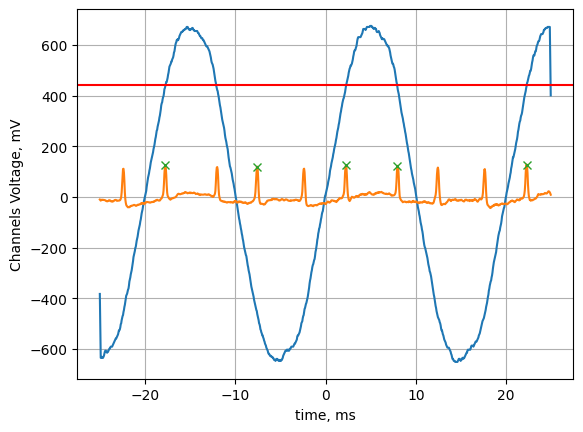

In [35]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/2.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                     usecols=[1,2,3], unpack=True)

ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

ch1 = smooth(ch1, 5)
ch2 = smooth(ch2, 5)

plt.plot(t, ch1)
plt.plot(t, ch2)
plt.grid()
peaks, locs = find_peaks(ch2, height=100, distance=100)
plt.plot(t[peaks], ch2[peaks], 'x')
print(ch1[peaks])
vmean = np.mean(np.abs(ch1[peaks]))
vstd = np.std(np.abs(ch1[peaks]))
v0_2 = ufloat(vmean, vstd)
plt.axhline(vmean, color='red')
plt.ylabel('Channels Voltage, mV')
plt.xlabel('time, ms')
print(f'resonance voltage {v0_2} mV')

# 1 kHz experiment

DC = 0.539 mA

Wavegen = 1Khz, amplitude 5 Vpp

resonance voltage 460+/-9 V


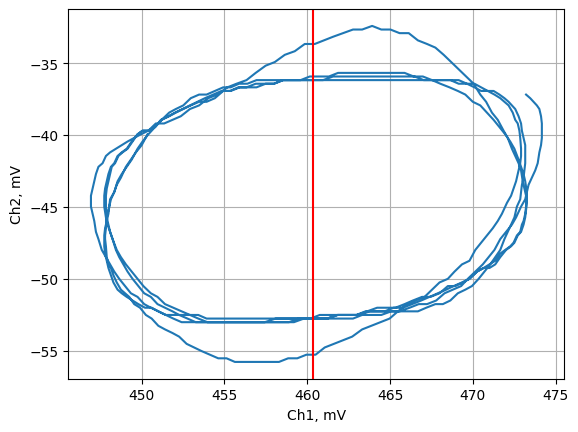

In [36]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/539.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                     usecols=[1,2,3], unpack=True)
ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms



plt.plot(ch1, ch2)
plt.grid()
vmean = np.mean(ch1)
vstd = np.std(ch1)
v0_3 = ufloat(vmean, vstd)
plt.axvline(vmean, color='red')
plt.xlabel('Ch1, mV')
plt.ylabel('Ch2, mV')

print(f'resonance voltage {v0_3} V')

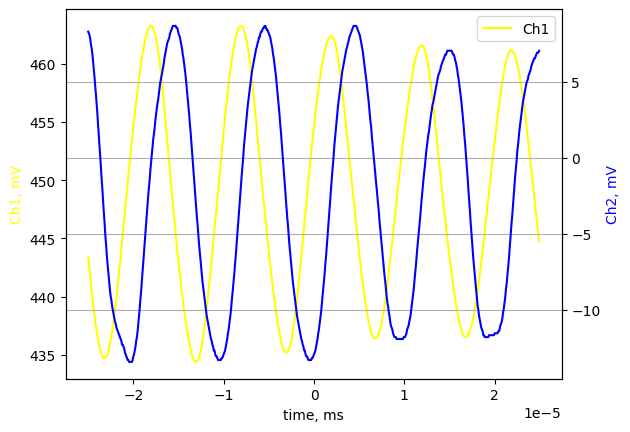

In [50]:
fig, ax1 = plt.subplots()
ax1.plot(t, ch1, color='yellow', label='Ch1')
ax2 = ax1.twinx()
ax2.plot(t, ch2, color='blue', label='Ch2')
ax1.set_xlabel('time, ms')
ax1.set_ylabel('Ch1, mV', color='yellow')
ax2.set_ylabel('Ch2, mV', color='blue')
ax1.legend()

plt.grid()

WaveGen Amplitude 1 Vpp

resonance voltage 449+/-9 V


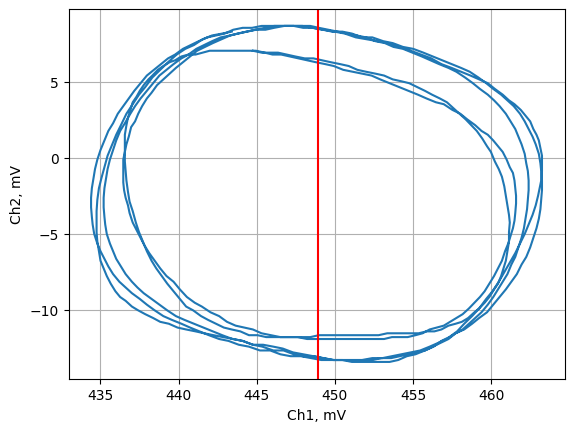

In [41]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/539_1Vpp.csv'

t, ch1, ch2 = np.genfromtxt(filename, skip_header=6, delimiter=',',
                     usecols=[1,2,3], unpack=True)
ch1 *=1e3 # mV
ch2 *=1e3 # mV
t *=1e3   # ms

plt.plot(ch1, ch2)
plt.grid()
vmean = np.mean(ch1)
vstd = np.std(ch1)
v0_4 = ufloat(vmean, vstd)
plt.axvline(vmean, color='red')
plt.xlabel('Ch1, mV')
plt.ylabel('Ch2, mV')


print(f'resonance voltage {v0_4} V')

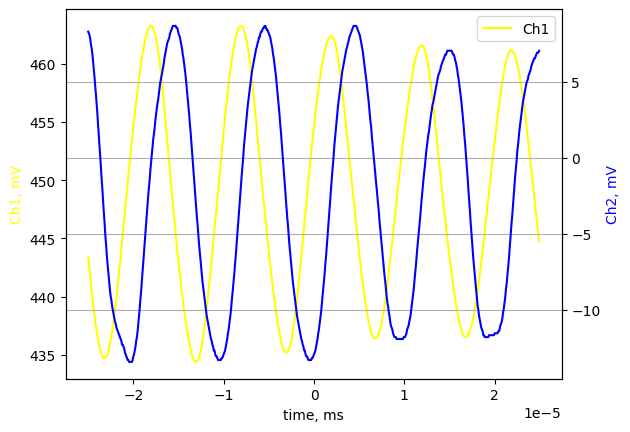

In [49]:
fig, ax1 = plt.subplots()
ax1.plot(t, ch1, color='yellow', label='Ch1')
ax2 = ax1.twinx()
ax2.plot(t, ch2, color='blue', label='Ch2')
ax1.set_xlabel('time, ms')
ax1.set_ylabel('Ch1, mV', color='yellow')
ax2.set_ylabel('Ch2, mV', color='blue')
ax1.legend()

plt.grid()


# Results


## Measurements at 50 Hz

In [44]:
print(f'Method a: resonance voltage {v0_1} mV')
print(f'Method b: resonance voltage {v0_2} mV')

Method a: resonance voltage 428+/-5 mV
Method b: resonance voltage 442+/-10 mV


## Measurements at 1kHz

In [43]:
print(f'Method 1 (5 Vpp): resonance voltage {v0_3} mV')
print(f'Method 2 (1 Vpp): resonance voltage {v0_4} mV')

Method 1 (5 Vpp): resonance voltage 460+/-9 mV
Method 2 (1 Vpp): resonance voltage 449+/-9 mV
